In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
iris_df = pd.read_csv('Iris.csv')

# Separate features and target variable
X = df.drop(['Id', 'Species'], axis=1) 
y = df['Species']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [6]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Perform Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_data)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


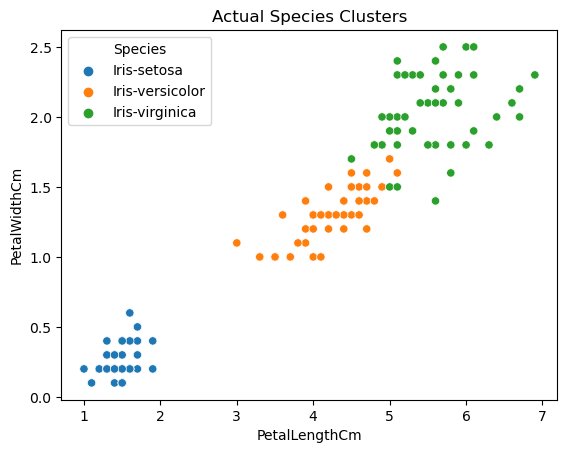

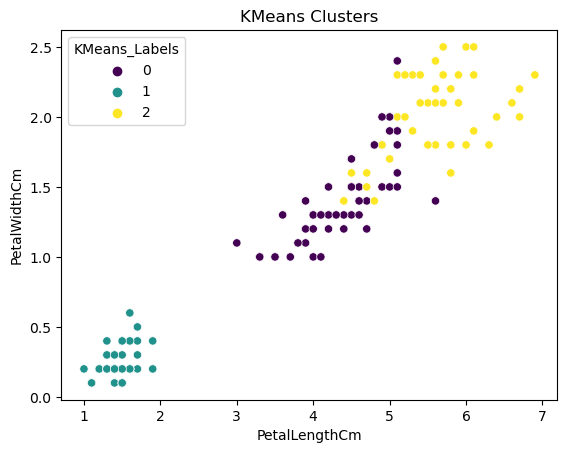

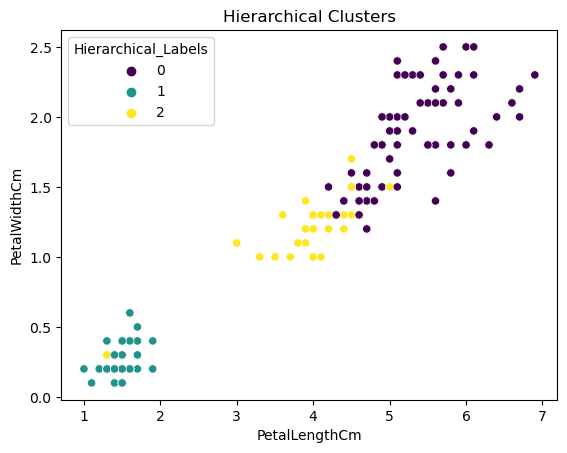

In [10]:
# Visualize the clusters
sns.scatterplot(data=iris_df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title('Actual Species Clusters')
plt.show()

sns.scatterplot(data=iris_df, x='PetalLengthCm', y='PetalWidthCm', hue='KMeans_Labels', palette='viridis')
plt.title('KMeans Clusters')
plt.show()

sns.scatterplot(data=iris_df, x='PetalLengthCm', y='PetalWidthCm', hue='Hierarchical_Labels', palette='viridis')
plt.title('Hierarchical Clusters')
plt.show()

In [8]:

iris_df['KMeans_Labels'] = kmeans_labels
iris_df['Hierarchical_Labels'] = hierarchical_labels
kmeans_score = silhouette_score(scaled_data, kmeans_labels)
hierarchical_score = silhouette_score(scaled_data, hierarchical_labels)
print(f"Silhouette Score (KMeans): {kmeans_score}")
print(f"Silhouette Score (Hierarchical): {hierarchical_score}")

Silhouette Score (KMeans): 0.4589717867018717
Silhouette Score (Hierarchical): 0.44553956399200406


In [11]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans_Labels,Hierarchical_Labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,0


In [9]:
iris_df.to_csv('iris_clustered.csv', index=False)